# Introduction

This project analyzes a data set containing information on traffic stops made based on the notion of "reasonable suspicion" in order to create statistical models which accurately predict whether an arrest was made after a "Terry Stop."

In [133]:
import numpy as np
import pandas as pd

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [135]:
df = pd.read_csv("Terry_Stops.csv")

In [4]:
df.head()

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,-,-1,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,...,11:32:00,-,-,-,SOUTH PCT 1ST W - ROBERT,N,N,South,O,O2
1,-,-1,20150000001463,28806,Field Contact,None,5670,1965,M,White,...,07:59:00,-,-,-,NaN,N,N,-,-,-
2,-,-1,20150000001516,29599,Field Contact,None,4844,1961,M,White,...,19:12:00,-,-,-,NaN,N,-,-,-,-
3,-,-1,20150000001670,32260,Field Contact,None,7539,1963,M,White,...,04:55:00,-,-,-,NaN,N,N,-,-,-
4,-,-1,20150000001739,33155,Field Contact,None,6973,1977,M,White,...,00:41:00,-,-,-,NaN,N,N,-,-,-


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49020 entries, 0 to 49019
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         49020 non-null  object
 1   Subject ID                49020 non-null  int64 
 2   GO / SC Num               49020 non-null  int64 
 3   Terry Stop ID             49020 non-null  int64 
 4   Stop Resolution           49020 non-null  object
 5   Weapon Type               49020 non-null  object
 6   Officer ID                49020 non-null  object
 7   Officer YOB               49020 non-null  int64 
 8   Officer Gender            49020 non-null  object
 9   Officer Race              49020 non-null  object
 10  Subject Perceived Race    49020 non-null  object
 11  Subject Perceived Gender  49020 non-null  object
 12  Reported Date             49020 non-null  object
 13  Reported Time             49020 non-null  object
 14  Initial Call Type     

In [6]:
df.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,4.902000e+04,4.902000e+04,4.902000e+04,49020.000000
mean,2.990501e+09,2.017683e+13,4.443287e+09,1983.064055
std,5.283252e+09,9.294550e+10,7.470587e+09,9.423197
min,-1.000000e+00,-1.000000e+00,2.802000e+04,1900.000000
25%,-1.000000e+00,2.016000e+13,1.892298e+05,1978.000000
50%,-1.000000e+00,2.018000e+13,4.203125e+05,1985.000000
75%,7.727135e+09,2.019000e+13,9.739575e+09,1990.000000
max,2.794456e+10,2.021000e+13,2.794508e+10,1998.000000


In [7]:
df.isna().any()

Subject Age Group           False
Subject ID                  False
GO / SC Num                 False
Terry Stop ID               False
Stop Resolution             False
Weapon Type                 False
Officer ID                  False
Officer YOB                 False
Officer Gender              False
Officer Race                False
Subject Perceived Race      False
Subject Perceived Gender    False
Reported Date               False
Reported Time               False
Initial Call Type           False
Final Call Type             False
Call Type                   False
Officer Squad                True
Arrest Flag                 False
Frisk Flag                  False
Precinct                    False
Sector                      False
Beat                        False
dtype: bool

In [125]:
df.head(10)

,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Arrest Flag,Frisk Flag
0,20140000120677,92317,1,0,7500,1984,1,0,Asian,1,2015-10-16T00:00:00,11:32:00,0,0
4,20150000001739,33155,0,0,6973,1977,1,1,Black or African American,1,2015-04-03T00:00:00,00:41:00,0,0
5,20150000001755,33571,0,0,7402,1973,1,1,Black or African American,1,2015-04-05T00:00:00,23:46:00,0,0
6,20150000002351,45252,0,0,7591,1985,1,0,Other,0,2015-05-20T00:00:00,21:39:00,0,0
7,20150000002363,45182,0,0,7591,1985,1,0,White,1,2015-05-20T00:00:00,22:40:00,0,0
8,20150000002392,45365,0,0,7560,1986,1,1,White,0,2015-05-22T00:00:00,07:39:00,0,0
15,20150000002677,49772,0,0,5065,1959,1,1,White,1,2015-06-03T00:00:00,10:08:00,0,0
16,20150000002678,49779,0,0,5065,1959,1,1,Black or African American,1,2015-06-03T00:00:00,09:49:00,0,1
22,20150000002833,52166,0,0,5966,1969,1,1,Other,1,2015-06-11T00:00:00,00:58:00,0,0
23,20150000002833,52167,0,0,5966,1969,1,1,American Indian or Alaska Native,1,2015-06-11T00:00:00,01:21:00,0,0


In [9]:
df = df.drop("Subject Age Group", axis = 1)
df = df.drop("Initial Call Type", axis = 1)
df = df.drop("Final Call Type", axis = 1)
df = df.drop("Call Type", axis = 1)
df = df.drop("Precinct", axis = 1)
df = df.drop("Sector", axis = 1)
df = df.drop("Beat", axis = 1)
df = df.drop("Subject ID", axis = 1)

In [127]:
df.head(10)

,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Arrest Flag,Frisk Flag
0,20140000120677,92317,1,0,7500,1984,1,0,Asian,1,2015-10-16T00:00:00,11:32:00,0,0
4,20150000001739,33155,0,0,6973,1977,1,1,Black or African American,1,2015-04-03T00:00:00,00:41:00,0,0
5,20150000001755,33571,0,0,7402,1973,1,1,Black or African American,1,2015-04-05T00:00:00,23:46:00,0,0
6,20150000002351,45252,0,0,7591,1985,1,0,Other,0,2015-05-20T00:00:00,21:39:00,0,0
7,20150000002363,45182,0,0,7591,1985,1,0,White,1,2015-05-20T00:00:00,22:40:00,0,0
8,20150000002392,45365,0,0,7560,1986,1,1,White,0,2015-05-22T00:00:00,07:39:00,0,0
15,20150000002677,49772,0,0,5065,1959,1,1,White,1,2015-06-03T00:00:00,10:08:00,0,0
16,20150000002678,49779,0,0,5065,1959,1,1,Black or African American,1,2015-06-03T00:00:00,09:49:00,0,1
22,20150000002833,52166,0,0,5966,1969,1,1,Other,1,2015-06-11T00:00:00,00:58:00,0,0
23,20150000002833,52167,0,0,5966,1969,1,1,American Indian or Alaska Native,1,2015-06-11T00:00:00,01:21:00,0,0


In [11]:
df = df[df["Subject Perceived Race"] != "-"]

In [12]:
df = df[df["Arrest Flag"] != "-"]

In [13]:
df = df[df["Frisk Flag"] != "-"]

In [128]:
df.head(10)

,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Arrest Flag,Frisk Flag
0,20140000120677,92317,1,0,7500,1984,1,0,Asian,1,2015-10-16T00:00:00,11:32:00,0,0
4,20150000001739,33155,0,0,6973,1977,1,1,Black or African American,1,2015-04-03T00:00:00,00:41:00,0,0
5,20150000001755,33571,0,0,7402,1973,1,1,Black or African American,1,2015-04-05T00:00:00,23:46:00,0,0
6,20150000002351,45252,0,0,7591,1985,1,0,Other,0,2015-05-20T00:00:00,21:39:00,0,0
7,20150000002363,45182,0,0,7591,1985,1,0,White,1,2015-05-20T00:00:00,22:40:00,0,0
8,20150000002392,45365,0,0,7560,1986,1,1,White,0,2015-05-22T00:00:00,07:39:00,0,0
15,20150000002677,49772,0,0,5065,1959,1,1,White,1,2015-06-03T00:00:00,10:08:00,0,0
16,20150000002678,49779,0,0,5065,1959,1,1,Black or African American,1,2015-06-03T00:00:00,09:49:00,0,1
22,20150000002833,52166,0,0,5966,1969,1,1,Other,1,2015-06-11T00:00:00,00:58:00,0,0
23,20150000002833,52167,0,0,5966,1969,1,1,American Indian or Alaska Native,1,2015-06-11T00:00:00,01:21:00,0,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46798 entries, 0 to 49019
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GO / SC Num               46798 non-null  int64 
 1   Terry Stop ID             46798 non-null  int64 
 2   Stop Resolution           46798 non-null  object
 3   Weapon Type               46798 non-null  object
 4   Officer ID                46798 non-null  object
 5   Officer YOB               46798 non-null  int64 
 6   Officer Gender            46798 non-null  object
 7   Officer Race              46798 non-null  object
 8   Subject Perceived Race    46798 non-null  object
 9   Subject Perceived Gender  46798 non-null  object
 10  Reported Date             46798 non-null  object
 11  Reported Time             46798 non-null  object
 12  Officer Squad             46184 non-null  object
 13  Arrest Flag               46798 non-null  object
 14  Frisk Flag            

In [16]:
df.isna().any()

GO / SC Num                 False
Terry Stop ID               False
Stop Resolution             False
Weapon Type                 False
Officer ID                  False
Officer YOB                 False
Officer Gender              False
Officer Race                False
Subject Perceived Race      False
Subject Perceived Gender    False
Reported Date               False
Reported Time               False
Officer Squad                True
Arrest Flag                 False
Frisk Flag                  False
dtype: bool

In [17]:
df = df.drop("Officer Squad", axis = 1)

In [18]:
df.isna().any()

GO / SC Num                 False
Terry Stop ID               False
Stop Resolution             False
Weapon Type                 False
Officer ID                  False
Officer YOB                 False
Officer Gender              False
Officer Race                False
Subject Perceived Race      False
Subject Perceived Gender    False
Reported Date               False
Reported Time               False
Arrest Flag                 False
Frisk Flag                  False
dtype: bool

In [19]:
df.head()

,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Arrest Flag,Frisk Flag
0,20140000120677,92317,Arrest,None,7500,1984,M,Black or African American,Asian,Male,2015-10-16T00:00:00,11:32:00,N,N
4,20150000001739,33155,Field Contact,None,6973,1977,M,White,Black or African American,Male,2015-04-03T00:00:00,00:41:00,N,N
5,20150000001755,33571,Field Contact,None,7402,1973,M,White,Black or African American,Male,2015-04-05T00:00:00,23:46:00,N,N
6,20150000002351,45252,Field Contact,None,7591,1985,M,Hispanic or Latino,Other,Female,2015-05-20T00:00:00,21:39:00,N,N
7,20150000002363,45182,Field Contact,None,7591,1985,M,Hispanic or Latino,White,Male,2015-05-20T00:00:00,22:40:00,N,N


In [20]:
df.loc[df["Stop Resolution"] == "Arrest", "Stop Resolution"] = "1"
df.loc[df["Stop Resolution"] == "Field Contact", "Stop Resolution"] = "0"
df.loc[df["Stop Resolution"] == "Citation / Infraction", "Stop Resolution"] = "0"

In [21]:
df.loc[df["Officer Gender"] == "M", "Officer Gender"] = "1"
df.loc[df["Officer Gender"] == "F", "Officer Gender"] = "0"

In [22]:
df.loc[df["Arrest Flag"] == "Y", "Arrest Flag"] = "1"
df.loc[df["Arrest Flag"] == "N", "Arrest Flag"] = "0"

In [23]:
df.loc[df["Frisk Flag"] == "Y", "Frisk Flag"] = "1"
df.loc[df["Frisk Flag"] == "N", "Frisk Flag"] = "0"

In [24]:
df.loc[df["Subject Perceived Gender"] == "Male", "Subject Perceived Gender"] = "1"
df.loc[df["Subject Perceived Gender"] == "Female", "Subject Perceived Gender"] = "0"
df.loc[df["Subject Perceived Gender"] == "Unable to Determine", "Subject Perceived Gender"] = "0"

In [129]:
df.head(10)

,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Arrest Flag,Frisk Flag
0,20140000120677,92317,1,0,7500,1984,1,0,Asian,1,2015-10-16T00:00:00,11:32:00,0,0
4,20150000001739,33155,0,0,6973,1977,1,1,Black or African American,1,2015-04-03T00:00:00,00:41:00,0,0
5,20150000001755,33571,0,0,7402,1973,1,1,Black or African American,1,2015-04-05T00:00:00,23:46:00,0,0
6,20150000002351,45252,0,0,7591,1985,1,0,Other,0,2015-05-20T00:00:00,21:39:00,0,0
7,20150000002363,45182,0,0,7591,1985,1,0,White,1,2015-05-20T00:00:00,22:40:00,0,0
8,20150000002392,45365,0,0,7560,1986,1,1,White,0,2015-05-22T00:00:00,07:39:00,0,0
15,20150000002677,49772,0,0,5065,1959,1,1,White,1,2015-06-03T00:00:00,10:08:00,0,0
16,20150000002678,49779,0,0,5065,1959,1,1,Black or African American,1,2015-06-03T00:00:00,09:49:00,0,1
22,20150000002833,52166,0,0,5966,1969,1,1,Other,1,2015-06-11T00:00:00,00:58:00,0,0
23,20150000002833,52167,0,0,5966,1969,1,1,American Indian or Alaska Native,1,2015-06-11T00:00:00,01:21:00,0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46798 entries, 0 to 49019
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GO / SC Num               46798 non-null  int64 
 1   Terry Stop ID             46798 non-null  int64 
 2   Stop Resolution           46798 non-null  object
 3   Weapon Type               46798 non-null  object
 4   Officer ID                46798 non-null  object
 5   Officer YOB               46798 non-null  int64 
 6   Officer Gender            46798 non-null  object
 7   Officer Race              46798 non-null  object
 8   Subject Perceived Race    46798 non-null  object
 9   Subject Perceived Gender  46798 non-null  object
 10  Reported Date             46798 non-null  object
 11  Reported Time             46798 non-null  object
 12  Arrest Flag               46798 non-null  object
 13  Frisk Flag                46798 non-null  object
dtypes: int64(3), object(11

In [27]:
df.drop(df.loc[df['Stop Resolution'] == '-'].index, inplace=True)
df.drop(df.loc[df['Weapon Type'] == '-'].index, inplace=True)
df.drop(df.loc[df['Officer ID'] == '-'].index, inplace=True)
df.drop(df.loc[df['Officer YOB'] == '-'].index, inplace=True)
df.drop(df.loc[df['Officer Gender'] == '-'].index, inplace=True)
df.drop(df.loc[df['Officer Race'] == '-'].index, inplace=True)
df.drop(df.loc[df['Subject Perceived Race'] == '-'].index, inplace=True)
df.drop(df.loc[df['Subject Perceived Gender'] == '-'].index, inplace=True)
df.drop(df.loc[df['Reported Date'] == '-'].index, inplace=True)
df.drop(df.loc[df['Reported Time'] == '-'].index, inplace=True)
df.drop(df.loc[df['Arrest Flag'] == '-'].index, inplace=True)
df.drop(df.loc[df['Frisk Flag'] == '-'].index, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34551 entries, 0 to 48985
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GO / SC Num               34551 non-null  int64 
 1   Terry Stop ID             34551 non-null  int64 
 2   Stop Resolution           34551 non-null  object
 3   Weapon Type               34551 non-null  object
 4   Officer ID                34551 non-null  object
 5   Officer YOB               34551 non-null  int64 
 6   Officer Gender            34551 non-null  object
 7   Officer Race              34551 non-null  object
 8   Subject Perceived Race    34551 non-null  object
 9   Subject Perceived Gender  34551 non-null  object
 10  Reported Date             34551 non-null  object
 11  Reported Time             34551 non-null  object
 12  Arrest Flag               34551 non-null  object
 13  Frisk Flag                34551 non-null  object
dtypes: int64(3), object(11

In [29]:
df.head()

,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Arrest Flag,Frisk Flag
0,20140000120677,92317,1,None,7500,1984,1,Black or African American,Asian,1,2015-10-16T00:00:00,11:32:00,0,0
4,20150000001739,33155,0,None,6973,1977,1,White,Black or African American,1,2015-04-03T00:00:00,00:41:00,0,0
5,20150000001755,33571,0,None,7402,1973,1,White,Black or African American,1,2015-04-05T00:00:00,23:46:00,0,0
6,20150000002351,45252,0,None,7591,1985,1,Hispanic or Latino,Other,0,2015-05-20T00:00:00,21:39:00,0,0
7,20150000002363,45182,0,None,7591,1985,1,Hispanic or Latino,White,1,2015-05-20T00:00:00,22:40:00,0,0


In [130]:
df.head(10)

,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Arrest Flag,Frisk Flag
0,20140000120677,92317,1,0,7500,1984,1,0,Asian,1,2015-10-16T00:00:00,11:32:00,0,0
4,20150000001739,33155,0,0,6973,1977,1,1,Black or African American,1,2015-04-03T00:00:00,00:41:00,0,0
5,20150000001755,33571,0,0,7402,1973,1,1,Black or African American,1,2015-04-05T00:00:00,23:46:00,0,0
6,20150000002351,45252,0,0,7591,1985,1,0,Other,0,2015-05-20T00:00:00,21:39:00,0,0
7,20150000002363,45182,0,0,7591,1985,1,0,White,1,2015-05-20T00:00:00,22:40:00,0,0
8,20150000002392,45365,0,0,7560,1986,1,1,White,0,2015-05-22T00:00:00,07:39:00,0,0
15,20150000002677,49772,0,0,5065,1959,1,1,White,1,2015-06-03T00:00:00,10:08:00,0,0
16,20150000002678,49779,0,0,5065,1959,1,1,Black or African American,1,2015-06-03T00:00:00,09:49:00,0,1
22,20150000002833,52166,0,0,5966,1969,1,1,Other,1,2015-06-11T00:00:00,00:58:00,0,0
23,20150000002833,52167,0,0,5966,1969,1,1,American Indian or Alaska Native,1,2015-06-11T00:00:00,01:21:00,0,0


In [31]:
df.loc[df['Weapon Type'] != "None", 'Weapon Type'] = "1"

In [32]:
df.loc[df['Weapon Type'] == "None", 'Weapon Type'] = "0"

In [33]:
df.loc[df['Officer Race'] != "White", 'Officer Race'] = "0"

In [34]:
df.loc[df['Officer Race'] == "White", 'Officer Race'] = "1"

In [131]:
df.head(10)

,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Arrest Flag,Frisk Flag
0,20140000120677,92317,1,0,7500,1984,1,0,Asian,1,2015-10-16T00:00:00,11:32:00,0,0
4,20150000001739,33155,0,0,6973,1977,1,1,Black or African American,1,2015-04-03T00:00:00,00:41:00,0,0
5,20150000001755,33571,0,0,7402,1973,1,1,Black or African American,1,2015-04-05T00:00:00,23:46:00,0,0
6,20150000002351,45252,0,0,7591,1985,1,0,Other,0,2015-05-20T00:00:00,21:39:00,0,0
7,20150000002363,45182,0,0,7591,1985,1,0,White,1,2015-05-20T00:00:00,22:40:00,0,0
8,20150000002392,45365,0,0,7560,1986,1,1,White,0,2015-05-22T00:00:00,07:39:00,0,0
15,20150000002677,49772,0,0,5065,1959,1,1,White,1,2015-06-03T00:00:00,10:08:00,0,0
16,20150000002678,49779,0,0,5065,1959,1,1,Black or African American,1,2015-06-03T00:00:00,09:49:00,0,1
22,20150000002833,52166,0,0,5966,1969,1,1,Other,1,2015-06-11T00:00:00,00:58:00,0,0
23,20150000002833,52167,0,0,5966,1969,1,1,American Indian or Alaska Native,1,2015-06-11T00:00:00,01:21:00,0,0


In [36]:
df1 = df.filter(["Stop Resolution", "Weapon Type", "Officer Gender", "Officer Race", "Subject Perceived Gender", "Arrest Flag", "Frisk Flag"], axis=1)

In [37]:
df1.head()

,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Subject Perceived Gender,Arrest Flag,Frisk Flag
0,1,0,1,0,1,0,0
4,0,0,1,1,1,0,0
5,0,0,1,1,1,0,0
6,0,0,1,0,0,0,0
7,0,0,1,0,1,0,0


In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34551 entries, 0 to 48985
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Stop Resolution           34551 non-null  object
 1   Weapon Type               34551 non-null  object
 2   Officer Gender            34551 non-null  object
 3   Officer Race              34551 non-null  object
 4   Subject Perceived Gender  34551 non-null  object
 5   Arrest Flag               34551 non-null  object
 6   Frisk Flag                34551 non-null  object
dtypes: object(7)
memory usage: 3.4+ MB


In [39]:
df1.drop(df.loc[df['Stop Resolution'] == 'N'].index, inplace=True)
df1.drop(df.loc[df['Officer Gender'] == 'N'].index, inplace=True)
df1.drop(df.loc[df['Subject Perceived Gender'] == 'N'].index, inplace=True)
df1.drop(df.loc[df['Arrest Flag'] == 'N'].index, inplace=True)
df1.drop(df.loc[df['Frisk Flag'] == 'N'].index, inplace=True)

In [40]:
df1.drop(df.loc[df['Stop Resolution'] == 'Unknown'].index, inplace=True)
df1.drop(df.loc[df['Officer Gender'] == 'Unknown'].index, inplace=True)
df1.drop(df.loc[df['Subject Perceived Gender'] == 'Unknown'].index, inplace=True)
df1.drop(df.loc[df['Arrest Flag'] == 'Unknown'].index, inplace=True)
df1.drop(df.loc[df['Frisk Flag'] == 'Unknown'].index, inplace=True)

In [41]:
df1.drop(df.loc[df['Stop Resolution'] == 'Offense Report'].index, inplace=True)
df1.drop(df.loc[df['Officer Gender'] == 'Offense Report'].index, inplace=True)
df1.drop(df.loc[df['Subject Perceived Gender'] == 'Offense Report'].index, inplace=True)
df1.drop(df.loc[df['Arrest Flag'] == 'Offense Report'].index, inplace=True)
df1.drop(df.loc[df['Frisk Flag'] == 'Offense Report'].index, inplace=True)

In [42]:
df1.drop(df.loc[df['Stop Resolution'] == 'Referred for Prosecution'].index, inplace=True)
df1.drop(df.loc[df['Officer Gender'] == 'Referred for Prosecution'].index, inplace=True)
df1.drop(df.loc[df['Subject Perceived Gender'] == 'Referred for Prosecution'].index, inplace=True)
df1.drop(df.loc[df['Arrest Flag'] == 'Referred for Prosecution'].index, inplace=True)
df1.drop(df.loc[df['Frisk Flag'] == 'Referred for Prosecution'].index, inplace=True)

In [43]:
# DF1 to be used for model 1 keep DF as main dataframe

In [44]:
df.drop(df.loc[df['Stop Resolution'] == 'N'].index, inplace=True)
df.drop(df.loc[df['Weapon Type'] == 'N'].index, inplace=True)
df.drop(df.loc[df['Officer ID'] == 'N'].index, inplace=True)
df.drop(df.loc[df['Officer YOB'] == 'N'].index, inplace=True)
df.drop(df.loc[df['Officer Gender'] == 'N'].index, inplace=True)
df.drop(df.loc[df['Officer Race'] == 'N'].index, inplace=True)
df.drop(df.loc[df['Subject Perceived Race'] == 'N'].index, inplace=True)
df.drop(df.loc[df['Subject Perceived Gender'] == 'N'].index, inplace=True)
df.drop(df.loc[df['Reported Date'] == 'N'].index, inplace=True)
df.drop(df.loc[df['Reported Time'] == 'N'].index, inplace=True)
df.drop(df.loc[df['Arrest Flag'] == 'N'].index, inplace=True)
df.drop(df.loc[df['Frisk Flag'] == 'N'].index, inplace=True)

In [45]:
df.drop(df.loc[df['Stop Resolution'] == 'Unknown'].index, inplace=True)
df.drop(df.loc[df['Weapon Type'] == 'Unknown'].index, inplace=True)
df.drop(df.loc[df['Officer ID'] == 'Unknown'].index, inplace=True)
df.drop(df.loc[df['Officer YOB'] == 'Unknown'].index, inplace=True)
df.drop(df.loc[df['Officer Gender'] == 'Unknown'].index, inplace=True)
df.drop(df.loc[df['Officer Race'] == 'Unknown'].index, inplace=True)
df.drop(df.loc[df['Subject Perceived Race'] == 'Unknown'].index, inplace=True)
df.drop(df.loc[df['Subject Perceived Gender'] == 'Unknown'].index, inplace=True)
df.drop(df.loc[df['Reported Date'] == 'Unknown'].index, inplace=True)
df.drop(df.loc[df['Reported Time'] == 'Unknown'].index, inplace=True)
df.drop(df.loc[df['Arrest Flag'] == 'Unknown'].index, inplace=True)
df.drop(df.loc[df['Frisk Flag'] == 'Unknown'].index, inplace=True)

In [46]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20996 entries, 0 to 48985
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Stop Resolution           20996 non-null  object
 1   Weapon Type               20996 non-null  object
 2   Officer Gender            20996 non-null  object
 3   Officer Race              20996 non-null  object
 4   Subject Perceived Gender  20996 non-null  object
 5   Arrest Flag               20996 non-null  object
 6   Frisk Flag                20996 non-null  object
dtypes: object(7)
memory usage: 1.9+ MB


In [47]:
df1.isna().any()

Stop Resolution             False
Weapon Type                 False
Officer Gender              False
Officer Race                False
Subject Perceived Gender    False
Arrest Flag                 False
Frisk Flag                  False
dtype: bool

In [48]:
df.head()

,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Arrest Flag,Frisk Flag
0,20140000120677,92317,1,0,7500,1984,1,0,Asian,1,2015-10-16T00:00:00,11:32:00,0,0
4,20150000001739,33155,0,0,6973,1977,1,1,Black or African American,1,2015-04-03T00:00:00,00:41:00,0,0
5,20150000001755,33571,0,0,7402,1973,1,1,Black or African American,1,2015-04-05T00:00:00,23:46:00,0,0
6,20150000002351,45252,0,0,7591,1985,1,0,Other,0,2015-05-20T00:00:00,21:39:00,0,0
7,20150000002363,45182,0,0,7591,1985,1,0,White,1,2015-05-20T00:00:00,22:40:00,0,0


In [49]:
df1 = df1.astype({"Stop Resolution": float, "Weapon Type": float, "Officer Gender": float, "Officer Race": float, "Subject Perceived Gender": float, "Arrest Flag": float, "Frisk Flag": float,})

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20996 entries, 0 to 48985
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Stop Resolution           20996 non-null  float64
 1   Weapon Type               20996 non-null  float64
 2   Officer Gender            20996 non-null  float64
 3   Officer Race              20996 non-null  float64
 4   Subject Perceived Gender  20996 non-null  float64
 5   Arrest Flag               20996 non-null  float64
 6   Frisk Flag                20996 non-null  float64
dtypes: float64(7)
memory usage: 1.9 MB


In [51]:
# Main dataframe and first model DF Cleaned...

In [52]:
y = df1["Stop Resolution"]
X = df1.drop(columns=["Stop Resolution"], axis =1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [54]:
logreg = LogisticRegression(fit_intercept = False, C=1e12, solver = 'liblinear')

In [55]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [56]:
y_g_train = logreg.predict(X_train)
y_g_test = logreg.predict(X_test)

In [57]:
residuals = np.abs(y_train - y_g_train)

In [58]:
print(pd.Series(residuals).value_counts())
print("---------------------------------")
print(pd.Series(residuals).value_counts(normalize = True))

0.0    10393
1.0     5354
Name: Stop Resolution, dtype: int64
---------------------------------
0.0    0.659999
1.0    0.340001
Name: Stop Resolution, dtype: float64


In [59]:
residuals = np.abs(y_test - y_g_test)

In [60]:
print(pd.Series(residuals).value_counts())
print("---------------------------------")
print(pd.Series(residuals).value_counts(normalize = True))

0.0    3483
1.0    1766
Name: Stop Resolution, dtype: int64
---------------------------------
0.0    0.663555
1.0    0.336445
Name: Stop Resolution, dtype: float64


In [62]:
df.head()

,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Reported Date,Reported Time,Arrest Flag,Frisk Flag
0,20140000120677,92317,1,0,7500,1984,1,0,Asian,1,2015-10-16T00:00:00,11:32:00,0,0
4,20150000001739,33155,0,0,6973,1977,1,1,Black or African American,1,2015-04-03T00:00:00,00:41:00,0,0
5,20150000001755,33571,0,0,7402,1973,1,1,Black or African American,1,2015-04-05T00:00:00,23:46:00,0,0
6,20150000002351,45252,0,0,7591,1985,1,0,Other,0,2015-05-20T00:00:00,21:39:00,0,0
7,20150000002363,45182,0,0,7591,1985,1,0,White,1,2015-05-20T00:00:00,22:40:00,0,0


In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20996 entries, 0 to 48985
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Stop Resolution           20996 non-null  float64
 1   Weapon Type               20996 non-null  float64
 2   Officer Gender            20996 non-null  float64
 3   Officer Race              20996 non-null  float64
 4   Subject Perceived Gender  20996 non-null  float64
 5   Arrest Flag               20996 non-null  float64
 6   Frisk Flag                20996 non-null  float64
dtypes: float64(7)
memory usage: 1.9 MB


In [64]:
df1.head(10)

,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Subject Perceived Gender,Arrest Flag,Frisk Flag
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0
5,0.0,0.0,1.0,1.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,1.0,0.0,0.0,0.0
10,0.0,0.0,1.0,0.0,1.0,0.0,0.0
12,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13,0.0,0.0,1.0,1.0,0.0,0.0,0.0
15,0.0,0.0,1.0,1.0,1.0,0.0,0.0


In [67]:
y = df1["Stop Resolution"]
X = df1.drop(columns=["Stop Resolution"], axis =1)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [69]:
df1.head()

,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Subject Perceived Gender,Arrest Flag,Frisk Flag
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,0.0
5,0.0,0.0,1.0,1.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
clf = KNeighborsClassifier()

In [72]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
test_preds = clf.predict(X_test)

In [74]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [75]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [76]:
print_metrics(y_test, test_preds)

Precision Score: 0.5155763239875389
Recall Score: 0.47878495660559306
Accuracy Score: 0.6163078681653649
F1 Score: 0.4965


In [86]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

In [87]:
df1.describe()

,Stop Resolution,Weapon Type,Officer Gender,Officer Race,Subject Perceived Gender,Arrest Flag,Frisk Flag
count,20996.000000,20996.000000,20996.000000,20996.000000,20996.000000,20996.000000,20996.000000
mean,0.401696,0.093446,0.893742,0.761669,0.801677,0.021290,0.234187
std,0.490253,0.291064,0.308175,0.426073,0.398747,0.144352,0.423500
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [88]:
X = df1.drop("Stop Resolution", axis = 1)
y = df1["Stop Resolution"]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=10)

In [90]:
classifier = DecisionTreeClassifier(random_state = 10)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [91]:
y_pred = classifier.predict(X_test)

In [92]:
# Calculate accuracy 
acc = accuracy_score(y_test,y_pred) * 100
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy is :66.0952380952381

AUC is :0.61

Confusion Matrix
----------------


Predicted,0.0,1.0,All
True,,,
0.0,2162,345,2507
1.0,1079,614,1693
All,3241,959,4200


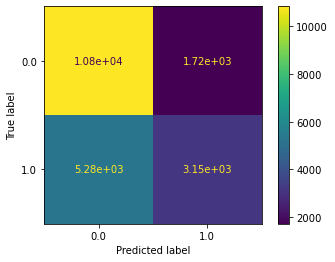

In [93]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifier, X, y, values_format='.3g')
plt.show()

In [94]:
classifier_2 = DecisionTreeClassifier(random_state=10, criterion='entropy')  
classifier_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

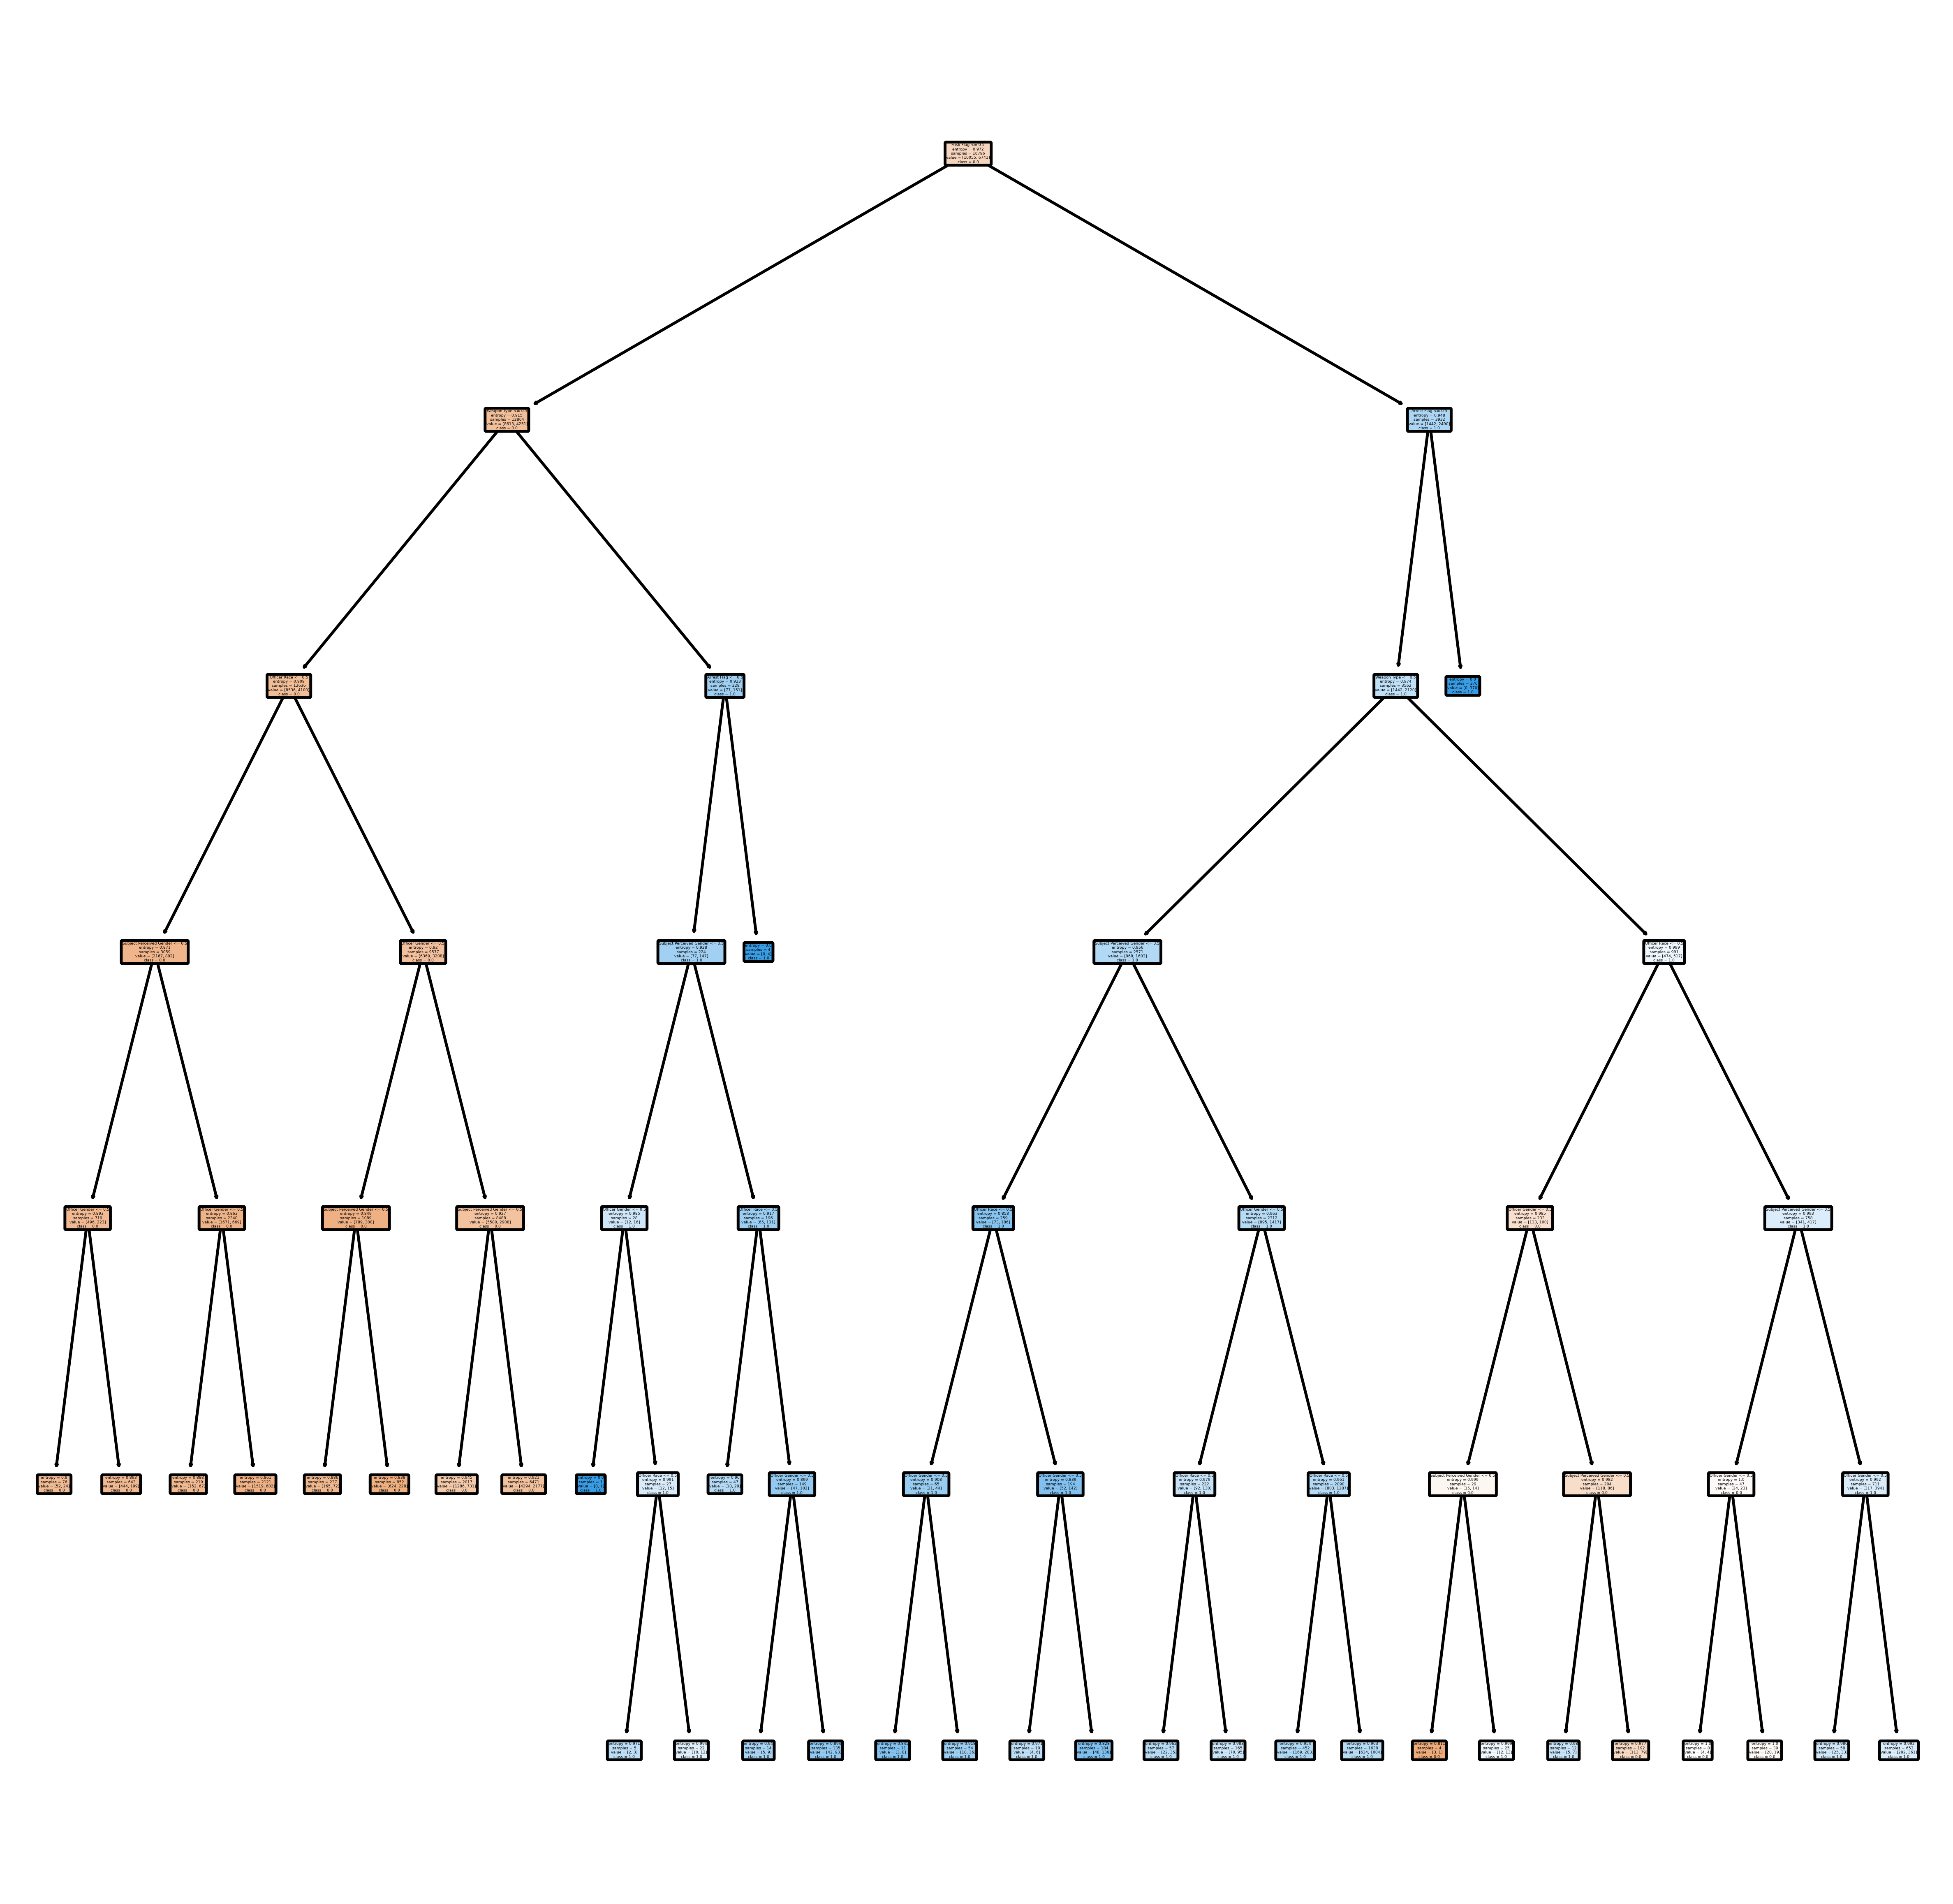

In [95]:
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(classifier_2, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [97]:
df1["Stop Resolution"].value_counts()

0.0    12562
1.0     8434
Name: Stop Resolution, dtype: int64

In [98]:
target = df1["Stop Resolution"]
df4 = df1.drop("Stop Resolution", axis = 1)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(df4, target, test_size = 0.25, random_state=42)

In [100]:
adaboost_clf = AdaBoostClassifier(random_state = 42)
gbt_clf = GradientBoostingClassifier(random_state = 42)

In [101]:
adaboost_clf.fit(X_train, y_train)

AdaBoostClassifier(random_state=42)

In [102]:
gbt_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [103]:
adaboost_train_preds = adaboost_clf.predict(X_train)
adaboost_test_preds = adaboost_clf.predict(X_test)

gbt_clf_train_preds = gbt_clf.predict(X_train)
gbt_clf_test_preds = gbt_clf.predict(X_test)

In [104]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds)
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.6617768463834381
F1-Score: 0.4678257394084732

Model: Gradient Boosted Trees
Accuracy: 0.668127262335683
F1-Score: 0.47719087635054025

Testing Metrics
Model: AdaBoost
Accuracy: 0.658220613450181
F1-Score: 0.46415770609318996

Model: Gradient Boosted Trees
Accuracy: 0.6599352257572871
F1-Score: 0.46444644464446444


In [105]:
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_test_preds)
adaboost_confusion_matrix

array([[2678,  480],
       [1314,  777]], dtype=int64)

In [106]:
gbt_confusion_matrix = confusion_matrix(y_test, gbt_clf_test_preds)
gbt_confusion_matrix

array([[2690,  468],
       [1317,  774]], dtype=int64)

In [107]:
adaboost_classification_report = classification_report(y_test, adaboost_test_preds)
print(adaboost_classification_report)

              precision    recall  f1-score   support

         0.0       0.67      0.85      0.75      3158
         1.0       0.62      0.37      0.46      2091

    accuracy                           0.66      5249
   macro avg       0.64      0.61      0.61      5249
weighted avg       0.65      0.66      0.64      5249



In [108]:
gbt_classification_report = classification_report(y_test, gbt_clf_test_preds)
print(gbt_classification_report)

              precision    recall  f1-score   support

         0.0       0.67      0.85      0.75      3158
         1.0       0.62      0.37      0.46      2091

    accuracy                           0.66      5249
   macro avg       0.65      0.61      0.61      5249
weighted avg       0.65      0.66      0.64      5249



In [109]:
# Run DT Through Grid Search

In [110]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [111]:
y = df1["Stop Resolution"]
x = df.drop("Stop Resolution", axis = 1)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [113]:
dt_clf = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)
print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 66.55%


In [115]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
    }

In [116]:
num_decision_trees = 3 * 2 * 6 * 3 * 6
print(f"Grid Search will have to search through {num_decision_trees} different permutations.")

Grid Search will have to search through 648 different permutations.


In [117]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=3, return_train_score=True)

In [118]:
# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True)

In [119]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 66.78%
Mean Test Score: 66.01%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [120]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, X_train, y_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 66.57%


In [121]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
    }

In [132]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(X_train, y_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 66.71%
Optimal Parameters: {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 10}


In [124]:
dt_score = dt_grid_search.score(X_test, y_test)
rf_score = rf_grid_search.score(X_test, y_test)

print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)

Decision tree grid search:  0.6601257382358544
Random forest grid search:  0.6599352257572871


In [ ]:
# Our DT Grid Search Score was slightly better than the Random Forest Grid Search

# Summary + Conclusions